<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 3. Modelos aleatorios </h3>
<h3 style="text-align: center;"> Conceptos teóricos</h3>

La mayoría de los sistemas tienen **parámetros y valores inciertos**. Por ejemplo, este es el caso de la tasa de contactos en una población, la tasa de nacimientos de una especie, la tasa de pedidos en un problema de inventario, etc. Por tanto, es deseable que los modelos incorporen esa incertidumbre en su formalizacion. La forma científica de incorporar incertidumbre es a través de **variables aleatorias** que representan los parámetros desconocidos. Los modelos estocásticos son aquellos que incorporan estas variables aleatorias en sus definición, tal y como ilustra la Figura 1. 

<img src="Sim_MC.jpg" 
     align="center" 
     width="500" />

Por tanto, algunos parámetros de entrada del modelo se representarán como variables aleatorias que seguirán unas **distribuciones de probabilidad** conocidas. Una vez procesadas, el sistema dará como salida unas variables que seguirán asimismo unas distribuciones de probabilidad desconocidas, pero determinadas por el sistema y los parámetros. Cuando no es posible encontrar estas distribuciones de probabilidad, se recurrirá a las simulaciones. 

### 1. Variables aleatorias y distribuciones de probabilidad 

En primer lugar, haremos un breve repaso a los conceptos de variables aleatorias y distribuciones de probabilidad, así como ejemplos teóricos de las mismas. 

Una **variable aleatoria $X$** es una variable cuyos valores están sujetos a variaciones debidas a la aletoriedad. Por ejemplo, el resultado de tirar una moneda al aire puede ser cara o cruz. Por tanto, la variable $X$ definida como "resultado de lanzar una moneda al aire" tiene dos posibles resultados {'cara', 'cruz'}, que están sujetos a una aleatoriedad. 

Muchas veces la aleatoriedad o posibilidad de cada uno de los resultados o sucesos posibles de una variable aleatoria se puede medir a través de una **probabilidad**, que es un valor en el intervalo $[0,1]$ y que mide la incertidumbre del resultado. En el caso del lanzamiento de la moneda, podemos concluir la probabilidad de obtener cara o cruz es 0.5 en ambos casos, ya que son igualmente probables. La suma de todas las probabilidades de sucesos posibles de una variable aleatoria deber ser 1. 

La **distribución de probabilidad** es por tanto una función $X \rightarrow [0,1]$ entre los posibles sucesos de una variable aleatoria $X$ y la probabilidad de obtener ese suceso. 

Hay dos grandes tipo de distribuciones de probabilidad: **discretas**, cuando los posibles sucesos de la variable aleatoria son un conjunto numerable de valores o resultados; y **continuas**, cuando los posibles sucesos son un conjunto no numerable de valores en un intervalo de los números reales. 

#### 1.1. Distribuciones de probabilidad discretas

Existen algunas distribuciones de probabilidad teóricas que son ampliamente encontradas en casos prácticos. Seguidamente repasamos brevemente algunas de ellas.

**Distribución Binomial $(X\sim B(n,p))$**: Esta distribucion indica la probabilidad de tener una número $x$ de éxitos observados en $n$ pruebas de Bernoulli independientes con probabilidad $p$. Por ejemplo, en el caso del lanzamiento de una moneda, la distribución $B(n,0.5)$ representa las distintas probabilidades de obtener $x$ caras en esos $n$ intentos. La función de probabilidad es la siguiente:  
    $$P[X=x]=\left( \begin{array}{c} n \\ x \end{array} \right) p^x (1-p)^{n-x}$$
La media ($\mu$) y la varianza ($\sigma^2$) son: $\mu$ = $np$;  $\sigma^2=np(1-p)$.

Seguidamente mostramos la gráfica de esta distribución teórica. 

In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
C:\Users\juant\AppData\Local\Temp\ipykernel_6008\3689741617.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$P[X \leq x]$')


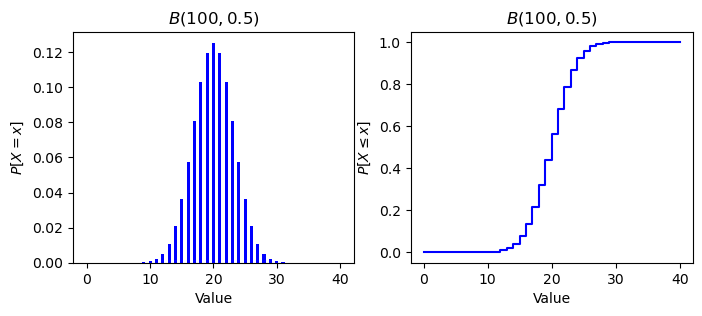

In [13]:
def plot_dist_disc(x,prob,prob_cum,name):
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    plt.bar(x,prob, 0.5, color='blue')
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('$P[X = x]$')

    plt.subplot(1, 2, 2)
    plt.step(x, prob_cum, where='post', color='blue')
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('$P[X \leq x]$')
    plt.show()

#Binomial
n=40
p=0.5
x=np.linspace(0,n,n+1).astype(int)
prob=st.binom.pmf(x, n, p, loc=0)
prob_cum=st.binom.cdf(x, n, p, loc=0)

plot_dist_disc(x,prob,prob_cum,'$B(100,0.5)$')


**Distribución Geométrica $(X\sim Geom(p))$**:  Cuenta el número $x$ de fallos en ensayos de Bernoulli con probabilidad de éxito $p$ hasta que el primer éxito se produce. La función de probabilidad es: 
    $$P[X=x]= p (1-p)^{x-1}$$
    $$\mu = \frac{1}{p};\;  \sigma^2=\frac{1-p}{p^2}$$.

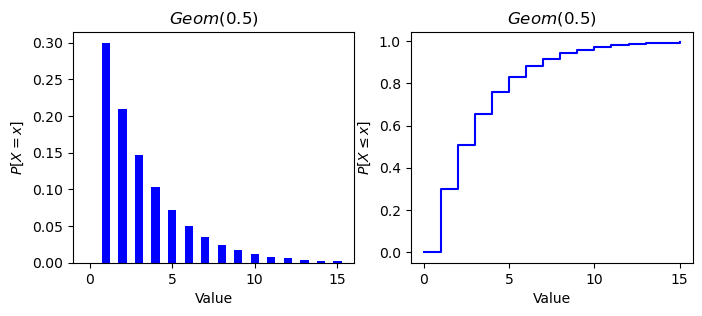

In [15]:
#Geométrica
p=0.3
n=15
x=np.linspace(0,n,n+1).astype(int)
prob=st.geom.pmf(x, p, loc=0)
prob_cum=st.geom.cdf(x, p, loc=0)

plot_dist_disc(x,prob,prob_cum,'$Geom(0.5)$')

**Distribución de Poisson $(X\sim Poisson(\lambda))$** Cuenta el número $x$ de veces que ocurre un evento durante un espacio de tiempo determinado, con un número esperado de veces $\lambda$. La función de probabilidad, media y varianza son: $$P[X=x]=\frac{1}{x!}\lambda^x e^{-\lambda}$$
$$\mu = \lambda;\;  \sigma^2=\lambda$$

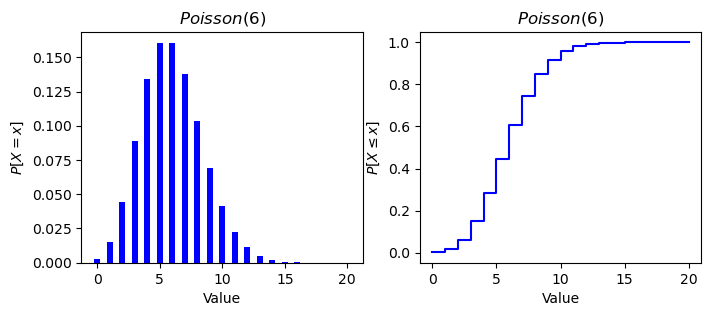

In [17]:
#Poisson
lamb=6
n=20
x=np.linspace(0,n,n+1).astype(int)
prob=st.poisson.pmf(x, lamb, loc=0)
prob_cum=st.poisson.cdf(x, lamb, loc=0)

plot_dist_disc(x,prob,prob_cum,'$Poisson(6)$')

#### 1.2. Distribuciones de probabilidad continuas

Son aquellas donde el número de sucesos posibles se encuentra en un intervalo continuo de números reales. En este caso, la función de distribución $F(x) = P[X \leq x]$ y la de densidad $f(x)=d F(x) /dx$ son funciones continuas. Destacamos tres de ellas:

**Distribución Uniforme $(U\sim U(a,b))$**: Asume que la probabilidad de seleccionar un valor $x$ en el intervalo $[a,b]$ es idéntica en cualquier valor. La función de densidad, media y varianza son: 
      $$f(x)= \frac{1}{b-a}$$
      $$\mu = \frac{a+b}{2};\;  \sigma^2=\frac{(b-a)^2}{12}$$..

Seguidamente mostramos la gráfica de la función de densidad y distribución de esta función teórica. 

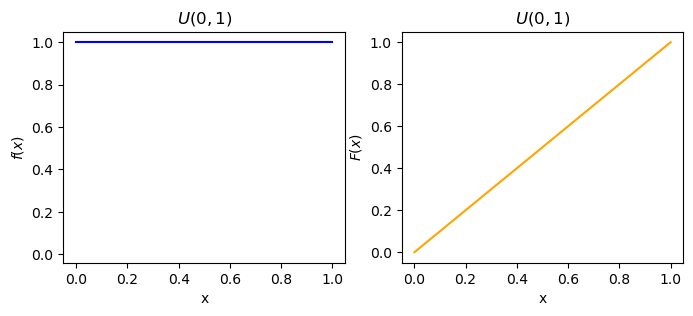

In [19]:
def plot_dist_cont(x,prob,prob_cum,name):
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    plt.plot(x,prob, 0.01, color='blue')
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('$f(x)$')

    plt.subplot(1, 2, 2)
    plt.plot(x,prob_cum, color='orange')
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('$F(x)$')
    plt.show()

#Uniforme
a=0
b=1
n=100
x=np.linspace(a,b,n+1)
prob=st.uniform.pdf(x,loc=0, scale=1)
prob_cum=st.uniform.cdf(x, loc=0, scale=1)

plot_dist_cont(x,prob,prob_cum,'$U(0,1)$')    

**Distribución Exponencial $(X\sim Exp(\lambda))$**: Es la versión continua de un proceso de Poisson. Indica el tiempo $x$ que transcurre hasta que un suceso se produce, siendo el tiempo medio de $1/\lambda$. La función de densidad, media y varianza son: 
    $$f(x)=\lambda e^{-\lambda*x}$$
    $$\mu = \frac{1}{\lambda};\;  \sigma^2=\frac{1}{\lambda^2}$$.

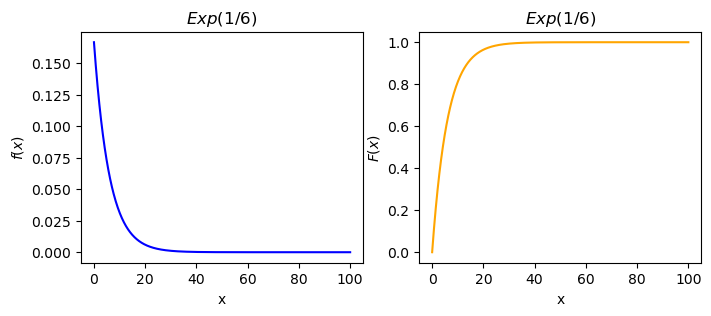

In [21]:
#Exponencial
lamb=1/6
n=100
x=np.linspace(0,n,10*n+1)
prob=st.expon.pdf(x,loc=0, scale=1/lamb)
prob_cum=st.expon.cdf(x, loc=0, scale=1/lamb)

plot_dist_cont(x,prob,prob_cum,'$Exp(1/6)$')    

**Distribución Normal $(X\sim N(\mu, \sigma^2))$**: Es una variable con probabilidad simétrica con respecto a la media $\mu$ y con una varianza $\sigma^2$. La función de densidad es: 
$$f(x)=\frac{1}{\sqrt{2\pi} \sigma} e^{\frac{(x-\mu)^2}{2\sigma^2}}$$

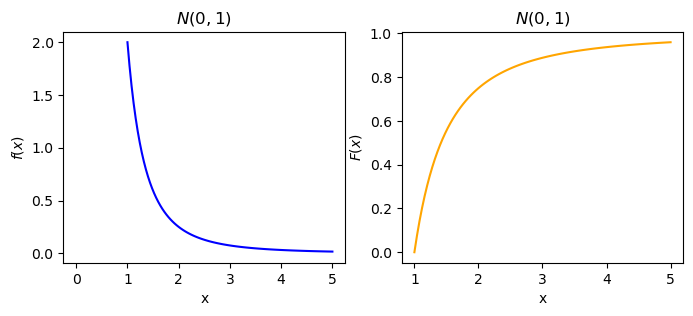

In [24]:
#Normal
mu=0
sigma=1
a=2
n=100
x=np.linspace(1,5,n+1)
prob=st.pareto.pdf(x,a)
prob_cum=st.pareto.cdf(x,a)

plot_dist_cont(x,prob,prob_cum,'$N(0,1)$')  

### 2. Simulaciones de Montecarlo

En un modelo estocástico, muchas veces no es posible conocer analíticamente las distribuciones de probabilidad de las variables de salida. En esos casos, una forma de analizar el modelo es a través de las **simulaciones de Montecarlo**, que consisten en el muestro repetitivo de las variables de entrada del modelo y la observación del conjunto de resultados obtenidos con esos muestreos. Estos resultados se asemejarán a las distribuciones de probabilidad de las variables de salida. 

La fiabilidad de este método de análisis viene justificada por la **ley de los grandes números**, resultado que indica que la media de los resultados de un muestreo de un modelo estocástico se aproxima a la media de la distribución aleatoria de ese modelo. 

A modo de comprobación de esta ley, realizamos una serie de simulaciones de Montecarlo de algunas de las distribuciones señaladas arriba, observando que la distribución empírica se ajusta a la distribución teórica. 

Para comprobarlo cuantitativamente, utilizamos el **test de Kolmogorov-Smirnov para dos muestras**, cuya hipótesis nula es que dos muestras vienen de la misma distribución de probabilidad. 

#### 2.1. Distribuciones discretas: 

In [6]:
def plot_dist_emp(x,sample_sim,prob_dist_th,prob_dist_sim,name):
    plt.figure(figsize=(8,2.5))
    plt.subplot(1, 2, 1)
    plt.hist(sample_sim, bins=2*len(x), label='simulated')
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Frecuencias')

    plt.subplot(1, 2, 2)
    plt.bar(x,prob_dist_sim,label='empirical')
    plt.scatter(x,prob_dist_th, label='theoretical')
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Dist. Prob.')
    plt.show()

num_samples = 1000


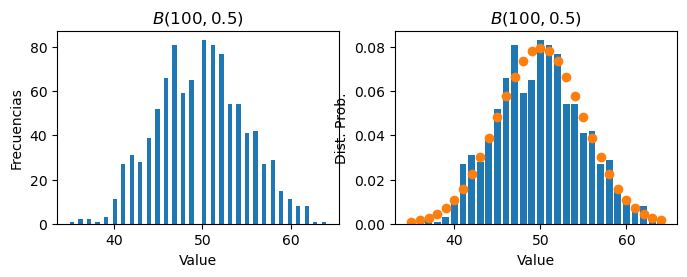

KstestResult(statistic=0.1, pvalue=0.9988393756362763, statistic_location=0.001, statistic_sign=-1)


In [8]:
#binomial
n=100
p=0.5
sample_sim=st.binom.rvs(n,p,size=num_samples)
unique, counts = np.unique(sample_sim, return_counts=True)
prob_dist_sim= counts/num_samples
x=unique
prob_dist_th=st.binom.pmf(x,n, p, loc=0)

plot_dist_emp(x,sample_sim,prob_dist_th,prob_dist_sim,'$B(100,0.5)$')

print(st.ks_2samp(prob_dist_th,prob_dist_sim))


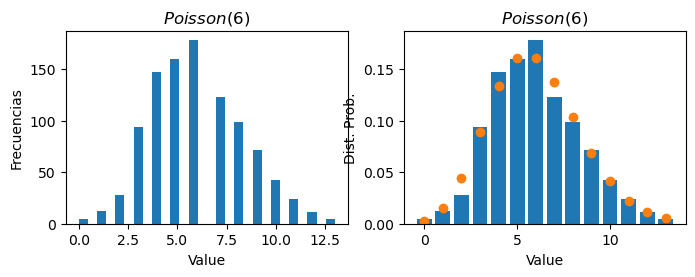

KstestResult(statistic=0.07142857142857142, pvalue=1.0, statistic_location=0.08923507835998894, statistic_sign=1)


C:\Users\juant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
#poisson
lamb=6
sample_sim=st.poisson.rvs(lamb,size=num_samples)
unique, counts = np.unique(sample_sim, return_counts=True)
prob_dist_sim= counts/num_samples
x=unique
prob_dist_th=st.poisson.pmf(x, lamb, loc=0)

plot_dist_emp(x,sample_sim,prob_dist_th,prob_dist_sim,'$Poisson(6)$')

print(st.ks_2samp(prob_dist_th,prob_dist_sim))


#### 2.2. Distribuciones continuas:

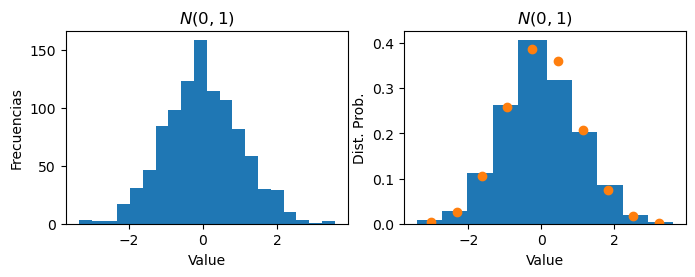

KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=0.0042727708253136485, statistic_sign=1)


In [45]:
#normal
mu=0
sigma=1
sample_sim_n=st.norm.rvs(mu, sigma,size=num_samples)

freq, bins = np.histogram(sample_sim_n,10)
x = (bins[:-1] + bins[1:]) / 2
wide=bins[1]-bins[0]
prob_dist_sim= freq/(num_samples*wide)
prob_dist_th=st.norm.pdf(x, mu, sigma)

plot_dist_emp(x,sample_sim_n,prob_dist_th,prob_dist_sim,'$N(0,1)$')

print(st.ks_2samp(prob_dist_th,prob_dist_sim))



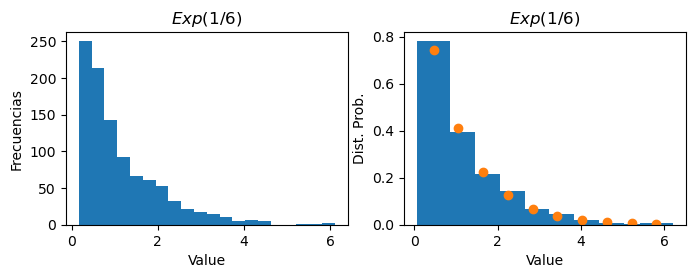

KstestResult(statistic=0.1, pvalue=1.0, statistic_location=0.21531771457092572, statistic_sign=-1)


In [47]:
#exponential
lamb=1/6
sample_sim_exp=st.expon.rvs(lamb,size=num_samples)
freq, bins = np.histogram(sample_sim_exp,10)
x = (bins[:-1] + bins[1:]) / 2
wide=bins[1]-bins[0]

prob_dist_sim= freq/(num_samples*wide)
prob_dist_th=st.expon.pdf(x,lamb)

plot_dist_emp(x,sample_sim_exp,prob_dist_th,prob_dist_sim,'$Exp(1/6)$')

print(st.ks_2samp(prob_dist_th,prob_dist_sim))


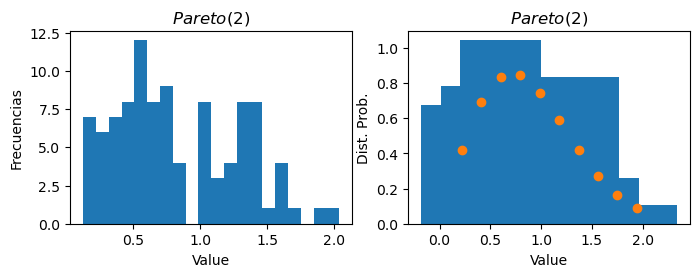

KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=0.4175481989793193, statistic_sign=-1)


In [47]:
#Weibull_min
a=2
sample_sim=st.weibull_min.rvs(a,size=num_samples)
freq, bins = np.histogram(sample_sim,10)
x = (bins[:-1] + bins[1:]) / 2
wide=bins[1]-bins[0]

prob_dist_sim= freq/(num_samples*wide)
prob_dist_th=st.weibull_min.pdf(x,a)

plot_dist_emp(x,sample_sim,prob_dist_th,prob_dist_sim,'$Pareto(2)$')

print(st.ks_2samp(prob_dist_th,prob_dist_sim))

#### 2.3. Parametrización de la distribución empirica:

Si no conocemos la distribución de probabilidad de la que proviene una muestra aleatoria pero se observa que sigue la forma de una teórica, podemos parametrizar la distribución teórica a los datos. Por ejemplo, en el caso de la distribución normal anterior, eligiendo valores tentativos de media $\mu$ y varianza $\sigma^2$. 

[0.5 2. ]
[0.5 2. ]
[0.5 2. ]
[0.50000001 2.        ]
[0.5        2.00000003]
[ 0.79700069 -0.82854795]
[0.57399019 1.20632338]
[0.5739902  1.20632338]
[0.57399019 1.2063234 ]
[0.66646717 0.52920184]
[0.66646718 0.52920184]
[0.66646717 0.52920185]
[0.6342205  0.57899022]
[0.63422051 0.57899022]
[0.6342205  0.57899023]
[0.64055838 0.5831564 ]
[0.64055839 0.5831564 ]
[0.64055838 0.58315641]
[0.64067011 0.58388372]
[0.64067012 0.58388372]
[0.64067011 0.58388373]
[0.64072797 0.583953  ]
[0.64072798 0.583953  ]
[0.64072797 0.583953  ]
[0.6407309  0.58396253]
Error cometido: 0.015236326834098467


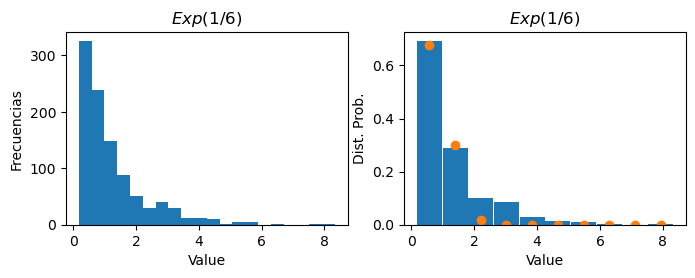

KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=0.00016362313963962994, statistic_sign=1)

In [53]:
"""" simulamos la distribución """

#exponencial
lamb=1/6
sigma=1
sample_sim_n=st.expon.rvs(lamb, size=num_samples)

freq, bins = np.histogram(sample_sim_n,10)
x = (bins[:-1] + bins[1:]) / 2
wide=bins[1]-bins[0]
prob_dist_sim= freq/(num_samples*wide)

"""" ajuste de los parámetros """

from scipy.optimize import leastsq

mu=0.5
sigma=2
celdas=10
params=(mu,sigma)

def error_func(params, data):
    print(params)
    """" Estimación de la distribución de probabilidad empírica"""
    mu,sigma = params
    freq, bins= np.histogram(data,celdas)
    x = (bins[:-1] + bins[1:]) / 2
    wide=bins[1]-bins[0]
    prob_dist_sim= freq/(num_samples*wide)
    
    """" Estimación de la distribución de probabilidad teórica y error cometido"""
    prob_dist_th=st.norm.pdf(x,mu,sigma)

    errors = prob_dist_th-prob_dist_sim
    return errors

"""" Ajuste de los parámetros"""

best_params, fit_details = leastsq(error_func, params, sample_sim_n)

mu_opt, sigma_opt = best_params

errors = st.norm.pdf(x,mu_opt,sigma_opt)-prob_dist_sim

print('Error cometido:', sum(errors**2))

"""" test de kolmogorov-smirnov de igualdad de distribuciones """

plot_dist_emp(x,sample_sim_n,st.norm.pdf(x,mu_opt,sigma_opt),prob_dist_sim,'$Exp(1/6)$')

st.ks_2samp(st.norm.pdf(x,mu_opt,sigma_opt),prob_dist_sim)

#### 2.4. Distribuciones empíricas:

También se podría realizar un muestreo aleatorio a una distribución de probabilidad empírica, conociendo su función de distribución. 

Por ejemplo, dada la distribución de frecuencias abajo indicada, construir la distribución de probabilidad, la función de densidad y tomar una muestra de 1000 valores de la variable que sigue la función de densidad.

**Nota**: En el muestreo tener en cuenta que dada $F$ una función de distribución y $U \sim U[0,1]$ la variable aleatoria uniforme, entonces la variable aleatoria $F^{-1}(U) \sim F$. Esto se demuestra fácilmente, ya que llamando en general $G$ la distribución aleatoria de $F^{-1}(U)$, se tiene que:
$$G(x)=P[F^{-1}(U) \leq x] = P[U \leq F(x)] = F(x),$$
por lo que $F^{-1}(U) \sim F$,

**Ejercicio** Dada la siguiente función de distribución: 

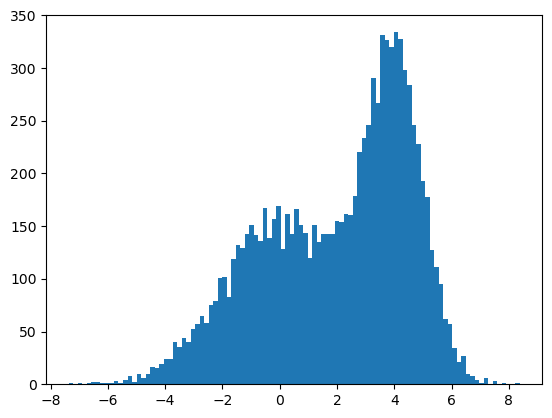

In [35]:
num_samples=5000
mu=0
sigma=2
sample1=st.norm.rvs(mu, sigma,size=num_samples)
mu=4
sigma=1
sample2=st.norm.rvs(mu, sigma,size=num_samples)
dist_emp = np.hstack((sample1, sample2))

bins=100
plt.hist(dist_emp,bins)
plt.show()

Realizar un muestreo aleatorio de tamaño n=100 de esta distribución. Comprobar que la distribución resultante se ajusta a la distribución empírica de la que proviene. 

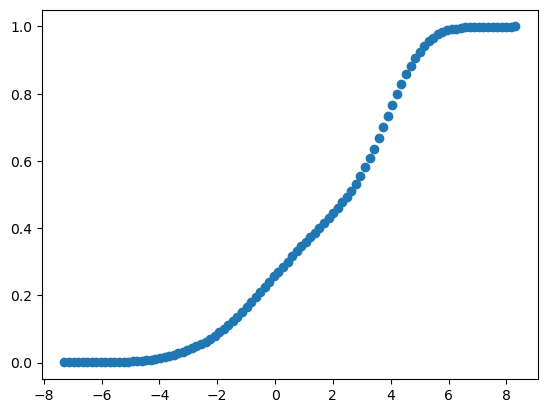

In [37]:
freq, bins = np.histogram(dist_emp,100)

x = (bins[:-1] + bins[1:]) / 2
prob_dist_sim= freq/(2*num_samples) #se multiplica por 2 puesto que se solaparon dos muestras

prob_dist_acum = np.cumsum(prob_dist_sim)

plt.scatter(x,prob_dist_acum, label='theoretical')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


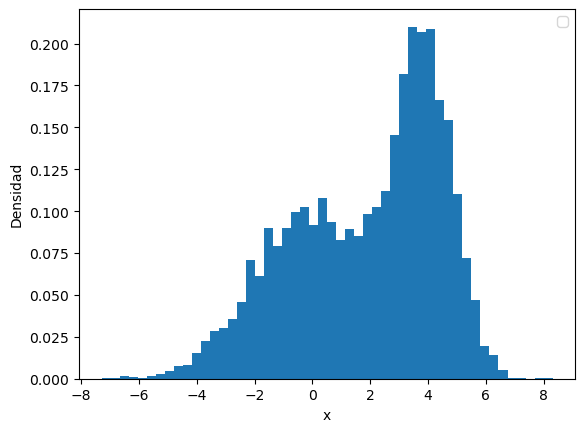

In [51]:
import random

def transf_inv(prob_dist_acum,x,num_samples):
    prob_func=pd.DataFrame({'x':x,'prob':prob_dist_acum})
    samp=[]
    for i in range(0,num_samples):
        a=random.random()
        a_r=min(prob_dist_acum, key=lambda x:abs(x-a))
        new_sample=prob_func.loc[prob_func['prob'] == a_r].x
        new_sample=pd.to_numeric(new_sample)
        samp.append(new_sample.iloc[0])
    return samp

num_samples=10000
samples=transf_inv(prob_dist_acum,x,num_samples)

plt.hist(samples, bins=50, density=True)
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.show()


##### Partiendo de la función de densidad:

Supongamos que partimos de una expresión conocida de la función de densidad $f(x)$. Entonces, para obtener muestras de la distribución de probabilidad utilizando el **método de la transformación inversa** deberíamos obtenerla función de distribución, que es: 
$$F(x)=\int_{x_0}^x f(x)ds.$$


Para realizar esta integral numéricamente podemos utilizar el método de Euler de la forma siguiente: 

$$F(x_{i+1}) = F(x_i) + (x_{i+1}-x_i)f(x_i).$$

Lo aplicamos al caso de la función de densidad Weibull, que sigue la expresión: 

$$f(x)= ax^{a-1}e^{-x^a},$$

con $a$ un parámetro determinado. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


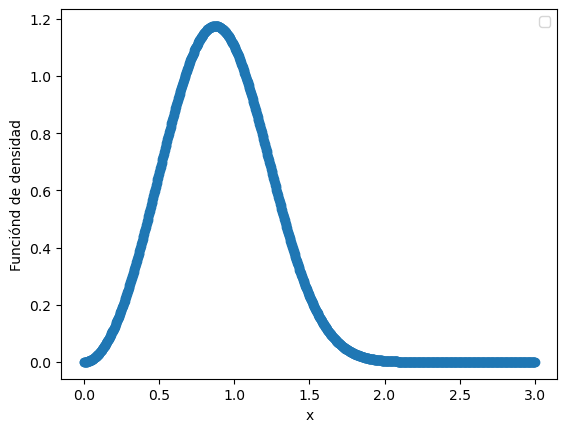

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


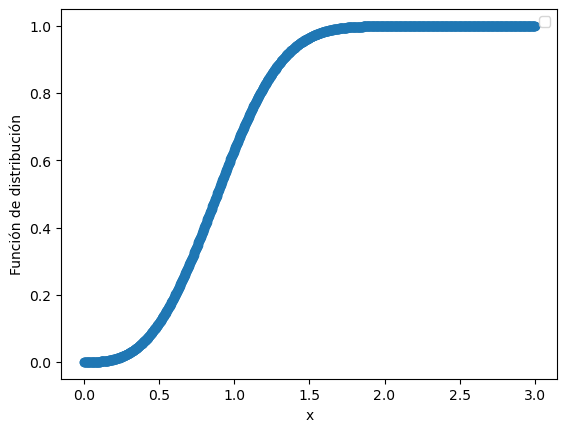

In [55]:
def weibull(p0,x, a):
    value = a*x**(a-1)*np.exp(-x**a)
    return value

def euler(f, p0, x, args=()):
    n = len(x)
    p = np.zeros(n)
    p[0] = p0
    for i in range(n - 1):
        p[i+1] = p[i] + (x[i+1] - x[i]) * f(p[i], x[i], *args)
    return p

p0=0
n=1000
a=3
x=np.linspace(0,3,n+1)
dens=weibull(p0,x,a)

plt.scatter(x,dens)
plt.xlabel("x")
plt.ylabel("Función de densidad")
plt.legend()
plt.show()

F = euler(weibull,p0, x, args=(a,))
plt.scatter(x,F)
plt.xlabel("x")
plt.ylabel("Función de distribución")
plt.legend()
plt.show()


y el muestreo se hace con el método de la transformación inversa: 

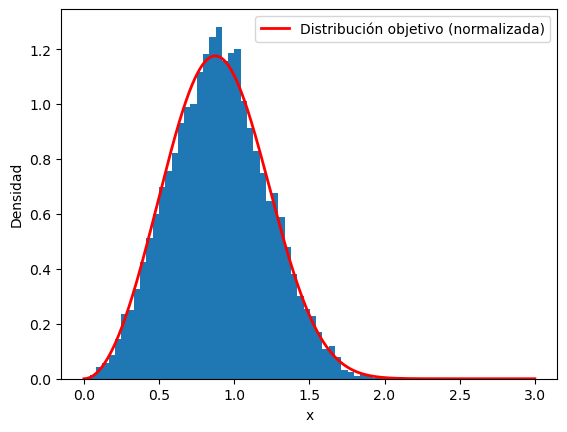

In [57]:
num_samples=10000

samples=transf_inv(F,x,num_samples)

plt.hist(samples, bins=50, density=True)
plt.plot(x, weibull(p0,x,a), "r-", lw=2, label="Distribución objetivo")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Utilizamos ahora el **Método de Metropolis-Hastings**. Es un proceso iterativo que se basa en la aceptación o rechazo de una muestra a partir de la diferencia en probabilidad de la muestra anterior. Brevemente, dada un muestra $x_i$ de la distribución de probabilidad, se escoge una muestra aleatoria siguiente $x^\prime$ que sigue la normal de media $x_i$ y una desviación estándar dada. Posteriormente, se evalúa la siguiente tasa:

$$ \alpha = {f(x^\prime) \over f(x_i)}
$$ 

Posteriormente se genera un número aleatorio entre $u \sim U(0,1).$ Entonces si $u<\alpha$, se acepta el número escogido $x^\prime$ como nueva muestra y $x_{i+1}=x^\prime$. En caso contrario se vuelve a muestrear un candidato. 

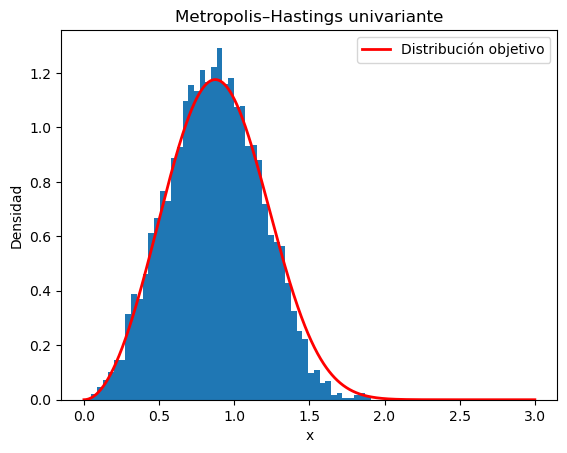

In [71]:
""" Estimación con el método Metropolis-Hastings """

def weibull(x, a):
    value = a*x**(a-1)*np.exp(-x**a)
    return value

# --- Algoritmo de Metropolis–Hastings (modificado a valores positivos)----
def metropolis_hastings(target_pdf, param, proposal_std, n_samples, x0):
    samples = [x0]
    current_x = x0
    
    for i in range(n_samples - 1):
        # distribución normal centrada en el punto actual
        proposal_x = np.random.normal(current_x, proposal_std)
        while proposal_x <= 0:
            proposal_x = np.random.normal(current_x, proposal_std)
            continue
        
        # Cálculo de alpha
        accept_ratio = target_pdf(proposal_x,param) / (target_pdf(current_x,param)+1e-9)
        
        # Aceptar o rechazar
        if np.random.rand() < min(1, accept_ratio):
            current_x = proposal_x
        
        samples.append(current_x)
    
    return np.array(samples)

n=1000
a=3
x=np.linspace(0,3,n+1)

proposal_std=0.1
n_samples=10000
x0=0.01

samples = metropolis_hastings(weibull,a, proposal_std, n_samples, x0)

plt.hist(samples, bins=50, density=True)
plt.plot(x, weibull(x,a), "r-", lw=2, label="Distribución objetivo")
plt.title("Metropolis–Hastings univariante")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.show()


## Referencias

- Law, A. M., Kelton, W. D., & Kelton, W. D. (2007). Simulation modeling and analysis (Vol. 3). New York: Mcgraw-hill.
- Sokolowski, J. A., & Banks, C. M. (2010). Modeling and simulation fundamentals: theoretical underpinnings and practical domains. John Wiley & Sons.

